**Цель работы:**
* Описать и визуализировать общую информацию о пользователях и поездках
* Визуализировать информацию о расстоянии и времени поездок для обеих категорий
* Посчитать помесячную вырочку, которую принес каждый пользователь 
* Проверить гипотезу: Тратят ли пользователи с подпиской больше времени на поездки?
* Проверить гипотезу: Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3100 метров?
* Проверить гипотезу: Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

**План работы:**
* Изучить общую информацию
* Провести предобработку данных
* Провести исследовательский анализ данных
* Провести подсчет выручки
* Проверить гипотезы
* Сделать общий вывод

**Описание данных:**

user_go.csv:
* user_id - уникальный идентификатор пользователя
* name - имя пользователя
* age - возраст
* city - город
* subscription_type - тип подписки (free, ultra)

rides_go.csv:
* user_id - уникальный идентификатор пользователя
* distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)
* duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
* date - дата совершения поездки

subscriptions_go.csv:
* subscription_type - тип подписки
* minute_price - стоимость одной минуты поездки по данной подписке
* start_ride_price - стоимость начала поездки
* subscription_fee - стоимость ежемесячного платежа

In [1]:
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np

#### Шаг 1. Загрузка данных

In [2]:
users = pd.read_csv("/datasets/users_go.csv")
rides = pd.read_csv("/datasets/rides_go.csv")
subs = pd.read_csv("/datasets/subscriptions_go.csv")

# Пользователи

In [3]:
display(users.head())

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


array([[<AxesSubplot:title={'center':'user_id'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

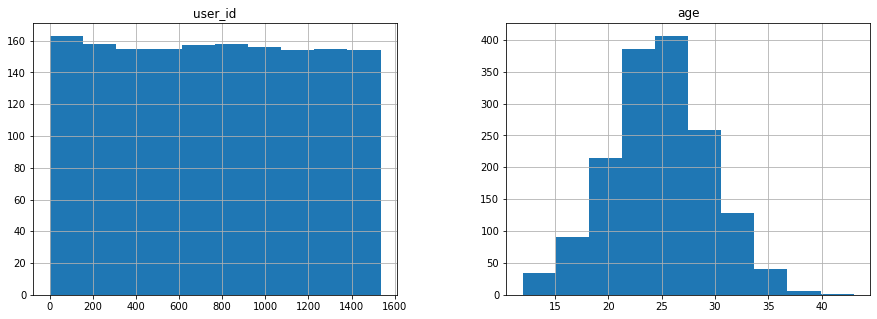

In [5]:
users.hist(figsize=(15, 5))

In [6]:
print(users["city"].unique())

['Тюмень' 'Омск' 'Москва' 'Ростов-на-Дону' 'Краснодар' 'Пятигорск'
 'Екатеринбург' 'Сочи']


При изучении датафрейма users не было обнаружено пропусков в данных, неявных дубликатов, неправильный тип данных и выбросы.

# Поездки

In [7]:
display(rides.head())

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [8]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


array([[<AxesSubplot:title={'center':'user_id'}>,
        <AxesSubplot:title={'center':'distance'}>],
       [<AxesSubplot:title={'center':'duration'}>, <AxesSubplot:>]],
      dtype=object)

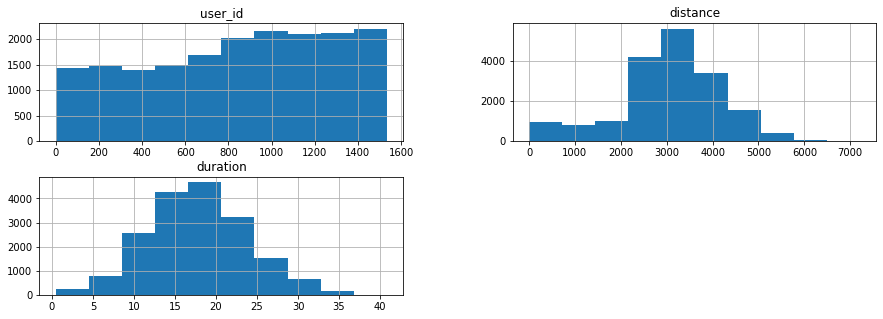

In [9]:
rides.hist(figsize=(15, 5))

При изучении датафрейма rides не было обнаружено пропусков в данных и неявные дубликаты. В столбце date был обнаружен неправильный тип данных. Также присутствуют некоторые выбросы в distance.

# Подписки

In [10]:
display(subs.head())

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [11]:
subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


При изучении датафрейма subscriptions не было обнаружено пропусков в данных, неявных дубликатов, неправильный тип данных и выбросы.

Во всех датафреймах отсутствуют пропуски в данных и неявные дубликаты. Тем не менее, в датафрейме rides в столбце date был обнаружен неправильный тип данных и некоторые выбросы в distance. В целом существенных проблем с данными обнаружено не было.

#### Шаг 2. Предобработка данных

# Пользователи

In [12]:
print(users.duplicated().sum())

31


In [13]:
users = users.drop_duplicates()

In [14]:
print(users["user_id"].duplicated().sum())

0


In [15]:
print(users.isna().sum())

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64


# Поездки

In [16]:
rides["date"] = pd.to_datetime(rides["date"], format = "%Y-%m-%dT")

In [17]:
rides["month"] = rides["date"].dt.month

In [18]:
print(rides.duplicated().sum())

0


In [19]:
print(rides.isna().sum())

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64


# Подписки

In [20]:
print(subs.duplicated().sum())

0


In [21]:
print(subs.isna().sum())

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


В ходе предобработки данных в датафрейме users были устранены дубликаты. Пропуски отсутствовали. В датафрейме rides исправлен неправильный тип данных в столбце date и был добавлен новый столбец month, который хранит в себе данные о номере месяца из date. В датафреймах rides и subscriptions пропуски и дубликаты обнаружено не было.

#### Шаг 3. Исследовательский анализ данных

Text(0, 0.5, 'Количество пользователей')

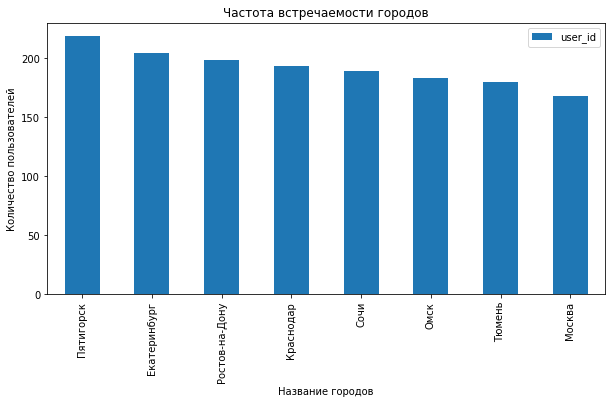

In [22]:
users_city = users.pivot_table(index="city", values="user_id", aggfunc="count").sort_values(by="user_id", ascending=False)
users_city.plot(kind='bar', figsize=(10, 5), title = "Частота встречаемости городов")
plt.xlabel('Название городов')
plt.ylabel('Количество пользователей')

In [23]:
print(users_city.sort_values(by="user_id", ascending=False))

                user_id
city                   
Пятигорск           219
Екатеринбург        204
Ростов-на-Дону      198
Краснодар           193
Сочи                189
Омск                183
Тюмень              180
Москва              168


Большинство пользователей находятся в Пятигорске, следом идут Екатеринбург и Ростов-на-Дону, образуя тройку лидеров. Городом с наименьшим количеством пользователей считается Москва, возможно из-за большого количества конкурентов. 

Text(0, 0.5, 'Количество пользователей')

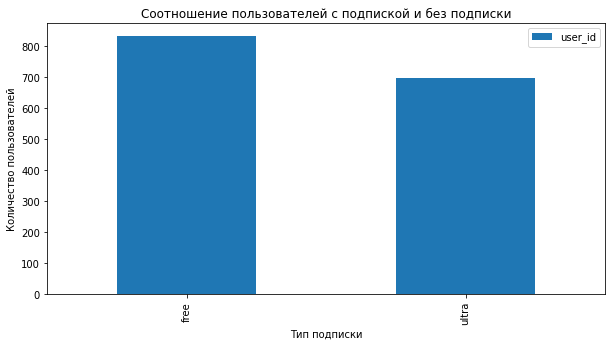

In [24]:
users_subs = users.pivot_table(index="subscription_type", values="user_id", aggfunc="count").sort_values(by="user_id", ascending=False)
users_subs.plot(kind='bar', figsize=(10,5), title = "Cоотношение пользователей с подпиской и без подписки")
plt.xlabel('Тип подписки')
plt.ylabel('Количество пользователей')

In [25]:
print(users_subs.sort_values(by="user_id", ascending=False))

                   user_id
subscription_type         
free                   835
ultra                  699


Большинство пользователей пользуются бесплатной подпиской, но эта цифра не сильно преобладает над пользователями подпиской ultra. 

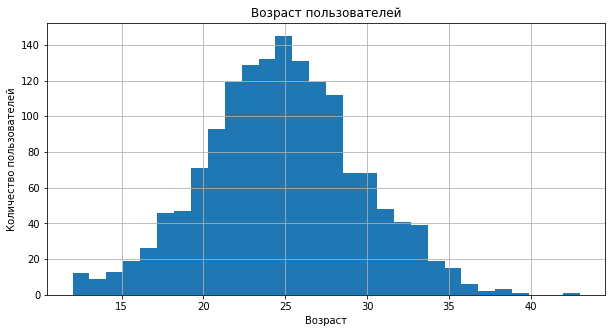

In [26]:
users["age"].plot(kind='hist', bins = 30, figsize=(10,5), title = "Возраст пользователей", grid = True)
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()

Наблюдаются некоторые выбросы после 40

<AxesSubplot:>

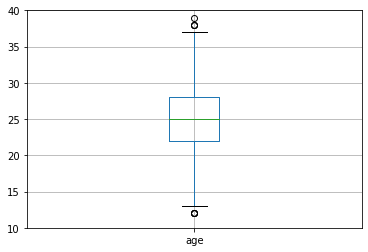

In [27]:
plt.ylim(10, 40)
users.boxplot("age")

Вверхний ус упирается в 37, а нижний в 13. Можно предположить, что значения за их пределом являются выбросами.

Text(0, 0.5, 'Количество пользователей')

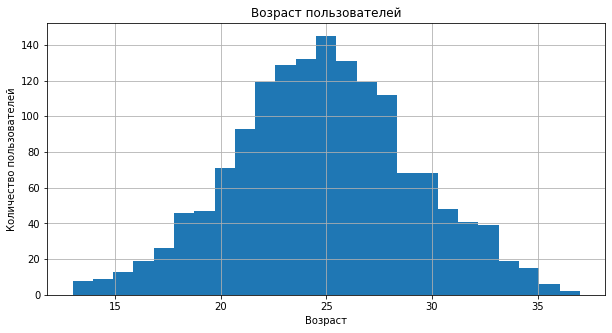

In [28]:
users_good = users.query(" 13 <= age <= 37")
users_good["age"].plot(kind='hist', bins = 25, figsize=(10,5), title = "Возраст пользователей", grid = True)
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')

In [29]:
users_good["age"].describe()

count    1525.000000
mean       24.890492
std         4.462053
min        13.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        37.000000
Name: age, dtype: float64

In [30]:
print(users_good["age"].mode())

0    25
dtype: int64


График показывает, что распределение возраста пользователей близко к нормальному. Медиана и мода равна приблизительно одному и тому же значению - 25. Люди в возрасте от 20 до 30 является основной аудиторией. Их доля составляет около 77% всех пользователей. При помощи гистограммы и boxplot было принято считать значения меньше 13 и больше 37 за выбросы.

Доля выбросов: 0.59%

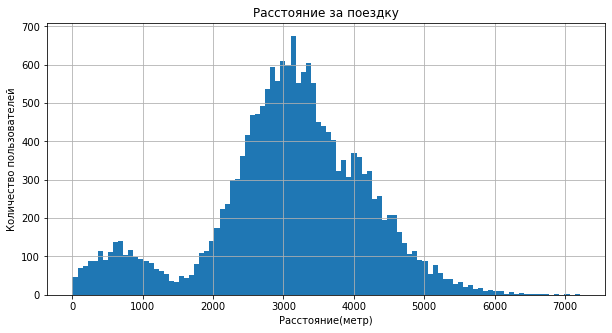

In [31]:
rides["distance"].plot(kind='hist', bins = 100, figsize=(10,5), title = "Расстояние за поездку", grid = True)
plt.xlabel('Расстояние(метр)')
plt.ylabel('Количество пользователей')
plt.show()

Распределение близко к нормальному. Широкий пик наблюдается от 2000 до 4000 метров. Есть некоторый пик в районе от 0 до 1500 метров. Значения после 6000 близки к нулю.

<AxesSubplot:>

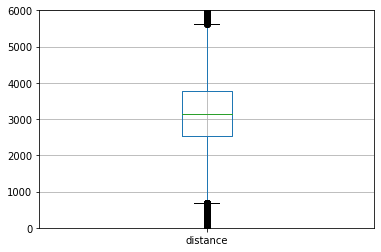

In [32]:
plt.ylim(0, 6000)
rides.boxplot("distance")

Вверхний ус упирается около 5630, а нижний около 680.

Text(0, 0.5, 'Количество пользователей')

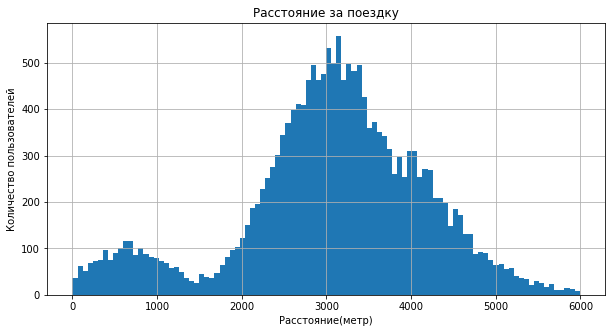

In [33]:
rides_good = rides.query("distance <= 6000")
rides_good["distance"].plot(kind='hist', bins = 100, figsize=(10,5), title = "Расстояние за поездку", grid = True)
plt.xlabel('Расстояние(метр)')
plt.ylabel('Количество пользователей')

In [34]:
rides_good["distance"].describe()

count    18022.000000
mean      3062.416517
std       1106.157955
min          0.855683
25%       2540.675712
50%       3131.383742
75%       3769.372328
max       5991.817697
Name: distance, dtype: float64

Большинство значений расположилось около 3000 метров. Пик в районе от 0 до 1500 показывает распределение на короткой дистанции. На их долю приходится 10% поездок. Остальной же график близок к нормальному распределению. Было принято считать, что значения больше 6000 считать за выбросы.

Доля выбросов: 1.3%

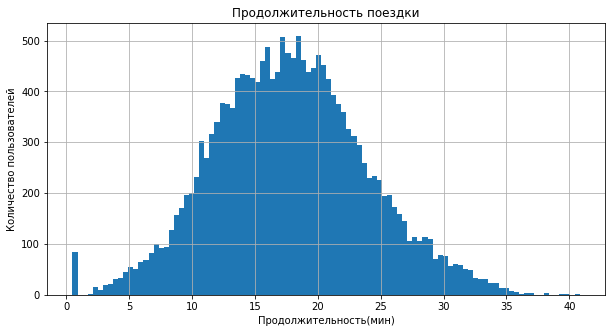

In [35]:
rides_good["duration"].plot(kind='hist', bins = 100, figsize=(10,5), title = "Продолжительность поездки", grid = True)
plt.xlabel('Продолжительность(мин)')
plt.ylabel('Количество пользователей')
plt.show()

Распределение продолжительности поездки близко к нормальному. Широкий пик приходится на диапазон от 10 до 25 минут. Присутсвует выброс около 0 минут. Значения после 35 минут близятся к нулю.

In [36]:
rides_good.query('duration < 4').head().sort_values(by = "distance", ascending = False)

,user_id,distance,duration,date,month
6570,704,4830.824371,0.500000,2021-10-14,10
6680,712,4684.004397,0.500000,2021-03-04,3
6531,701,4196.445201,0.500000,2021-08-31,8
5952,635,266.123499,3.760353,2021-12-23,12
6691,712,23.963062,2.053251,2021-11-22,11


In [37]:
print(users_good.query("user_id == 701"))
print(users_good.query("user_id == 712"))
print(users_good.query("user_id == 704"))

     user_id  name  age          city subscription_type
700      701  Иван   31  Екатеринбург              free
     user_id   name  age    city subscription_type
711      712  Дарья   28  Москва              free
     user_id   name  age            city subscription_type
703      704  Мирон   29  Ростов-на-Дону              free


После изучения выброса на отметке вблизи 0 были получены аномальные данные. За 30 секунд 3 пользователя преодолели расстояние свыше 4000 метров. При изучении user_id пользователей не было выявлено никакой связи с городом или датой поездки. Возможно присутствовали какие-то проблемы с самокатами.

<AxesSubplot:>

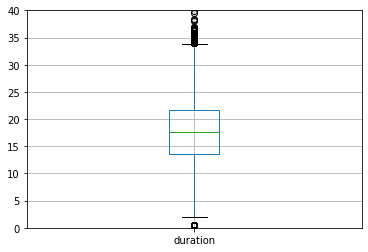

In [38]:
plt.ylim(0, 40)
rides_good.boxplot("duration")

Нижний ус находится около 2 минут. Верхний ус упирается в отметку, равную 34 минутам.

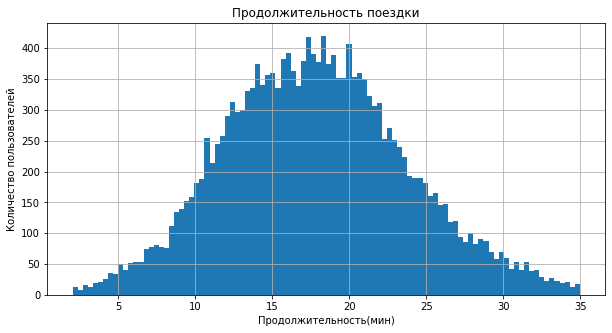

In [39]:
rides_good = rides_good.query("2 <= duration <= 35")
rides_good["duration"].plot(kind='hist', bins = 100, figsize=(10,5), title = "Продолжительность поездки", grid = True)
plt.xlabel('Продолжительность(мин)')
plt.ylabel('Количество пользователей')
plt.show()

In [40]:
rides_good["duration"].describe()

count    17909.000000
mean        17.852606
std          5.927000
min          2.035632
25%         13.656075
50%         17.696846
75%         21.709870
max         34.962659
Name: duration, dtype: float64

In [41]:
print(rides_good.query("10 <= duration <= 25").count())


user_id     14220
distance    14220
duration    14220
date        14220
month       14220
dtype: int64


Было принято решение считать значения меньше 2 и больше 35 за выбросы. Медиана находится на отметке около 17 минут. График подчиняется нормальному распределению. Можно сделать вывод, что большинство пользователей совершают поездки от 15 до 20 минут. Доля таких пользователей равна 79%.

Доля выбросов: 0.62%

Общий вывод по исследовательскому анализу данных: 
Большинство пользователей обосновалось в Пятигорске, Екатеринбурге и Ростове-на-Дону. Меньше всего пользователей находится в Москве. Возможно присутствует связь с наличием большого количества конкурентов в столице или развитой транспортной инфраструктуры. Пользователей подписки free на 19% больше чем ultra. Возможно пользователи не понимают выгоду от приобретения платной подписки или редко пользуются самокатом. Стоимость старта бесплатной подписки в 4 раза меньше чем абоненская плата. Пользователи могут не распологать информацией, что если они совершают как минимум 4 поездки в месяц, то они уже окупают платную подписку. Основной аудиторией являются люди в возрасте от 20 до 30 лет, их доля составляет 77%. Но больше всего самокатами пользуются 25 летние пользователи. Можно выделить 2 разных типа дистанции, которым соответствуют собственные пики. На короткой дистанции до 1500 метров, большинство пользователей проезжают около 650 метров. На большой дистанции значения расположились около 3000 метров. Касательно продолжительности поездки, то доля поездок от 15 до 20 минут составляет 79% от всех поездок. Большинство пользователей заканчивают поездку за 17 минут.


#### Шаг 4. Объединение данных

In [42]:
data = rides_good.copy()
data = data.merge(users_good, how = "left", on = "user_id")
data = data.merge(subs, how = "left", on = "subscription_type")

In [43]:
display(data)

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22.0,Тюмень,ultra,6.0,0.0,199.0
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22.0,Тюмень,ultra,6.0,0.0,199.0
2,1,754.159807,6.232113,2021-04-20,4,Кира,22.0,Тюмень,ultra,6.0,0.0,199.0
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22.0,Тюмень,ultra,6.0,0.0,199.0
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22.0,Тюмень,ultra,6.0,0.0,199.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17904,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25.0,Краснодар,free,8.0,50.0,0.0
17905,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25.0,Краснодар,free,8.0,50.0,0.0
17906,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25.0,Краснодар,free,8.0,50.0,0.0
17907,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25.0,Краснодар,free,8.0,50.0,0.0


In [44]:
print(data.describe())

            user_id      distance      duration         month           age  \
count  17909.000000  17909.000000  17909.000000  17909.000000  17802.000000   
mean     841.962812   3051.322956     17.852606      6.485678     24.873722   
std      435.081243   1099.976936      5.927000      3.434765      4.465135   
min        1.000000      0.855683      2.035632      1.000000     13.000000   
25%      485.000000   2536.639796     13.656075      4.000000     22.000000   
50%      887.000000   3125.624457     17.696846      6.000000     25.000000   
75%     1213.000000   3750.890385     21.709870      9.000000     28.000000   
max     1534.000000   5991.817697     34.962659     12.000000     37.000000   

       minute_price  start_ride_price  subscription_fee  
count  17802.000000      17802.000000      17802.000000  
mean       7.278283         31.957083         71.810808  
std        0.960526         24.013150         95.572338  
min        6.000000          0.000000          0.000000 

In [45]:
print(data.duplicated().sum())

0


In [46]:
print(data.isna().sum())

user_id                0
distance               0
duration               0
date                   0
month                  0
name                 107
age                  107
city                 107
subscription_type    107
minute_price         107
start_ride_price     107
subscription_fee     107
dtype: int64


In [47]:
data = data.dropna().reset_index(drop=True)

In [48]:
print(data.isna().sum())

user_id              0
distance             0
duration             0
date                 0
month                0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


In [49]:
display(data)

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22.0,Тюмень,ultra,6.0,0.0,199.0
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22.0,Тюмень,ultra,6.0,0.0,199.0
2,1,754.159807,6.232113,2021-04-20,4,Кира,22.0,Тюмень,ultra,6.0,0.0,199.0
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22.0,Тюмень,ultra,6.0,0.0,199.0
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22.0,Тюмень,ultra,6.0,0.0,199.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17797,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25.0,Краснодар,free,8.0,50.0,0.0
17798,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25.0,Краснодар,free,8.0,50.0,0.0
17799,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25.0,Краснодар,free,8.0,50.0,0.0
17800,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25.0,Краснодар,free,8.0,50.0,0.0


Были объединены все датафреймы. Размер объединенной таблицы соответствует ожиданиям - 17909 строчек данных. Дубликаты отсутствовали, но присутствовали пропущенные значения из-за удаления выбросов в соответствующих датафреймов. Было принято решение удалить эти данные. Их доля составляет 0.59%.

In [50]:
data_free = data.loc[data["subscription_type"] == "free"]

In [51]:
display(data_free.head())

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6424,700,2515.690719,14.944286,2021-01-02,1,Айдар,22.0,Омск,free,8.0,50.0,0.0
6425,700,846.932642,16.234663,2021-02-01,2,Айдар,22.0,Омск,free,8.0,50.0,0.0
6426,700,4004.434142,20.016628,2021-02-04,2,Айдар,22.0,Омск,free,8.0,50.0,0.0
6427,700,1205.911290,9.782872,2021-02-10,2,Айдар,22.0,Омск,free,8.0,50.0,0.0
6428,700,3047.379435,17.427673,2021-02-14,2,Айдар,22.0,Омск,free,8.0,50.0,0.0


In [52]:
data_ultra = data.loc[data["subscription_type"] == "ultra"]

In [53]:
display(data_ultra.head())

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22.0,Тюмень,ultra,6.0,0.0,199.0
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22.0,Тюмень,ultra,6.0,0.0,199.0
2,1,754.159807,6.232113,2021-04-20,4,Кира,22.0,Тюмень,ultra,6.0,0.0,199.0
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22.0,Тюмень,ultra,6.0,0.0,199.0
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22.0,Тюмень,ultra,6.0,0.0,199.0


Были созданы два дополнительных датафреймов с данными о пользователях без подписки и с подпиской.

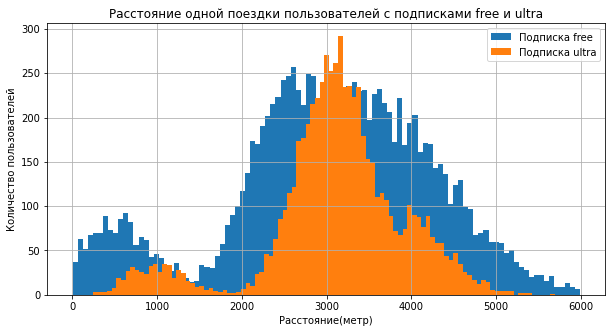

In [54]:
ax = data_free["distance"].plot(kind='hist', bins = 100, figsize=(10,5), label = "Подписка free", grid = True)
data_ultra['distance'].plot(kind='hist', bins = 100, figsize=(10,5), label = "Подписка ultra", grid = True, ax = ax)
plt.title('Расстояние одной поездки пользователей с подписками free и ultra')
plt.xlabel('Расстояние(метр)')
plt.ylabel('Количество пользователей')
plt.legend(loc='upper right')
plt.show()

In [55]:
print(data_ultra["distance"].describe())

count    6424.000000
mean     3109.783988
std       834.564521
min       244.210438
25%      2783.631172
50%      3146.205812
75%      3555.275884
max      5699.769662
Name: distance, dtype: float64


In [56]:
print(data_free["distance"].describe())

count    11378.000000
mean      3017.865344
std       1224.198263
min          0.855683
25%       2358.060822
50%       3098.603266
75%       3876.742186
max       5991.817697
Name: distance, dtype: float64


Медианное значение и пики обоих графиков расположились примерно на одинаковой отметке, равное 3000 метрам. В целом у пользователей подписки free график намного шире. Широкий пик приходится в диапазоне от 2000 до примерно 4500 метров. На их долю приходится 74% поездок free и 47% всех поездок. В свою очередь пользователи подписки ultra имеют острый пик от 2500 до 3500 метров. На их долю приходится около 60% поездок ultra и 21% всех поездок. Если рассматривать поездки на короткой дистанции, то у пользователей подписки free и ultra пики расположились около 500 и 1000 метров соответственно. В целом оба графики имеют схожую тенденцию и подчиняются нормальному распределению. 

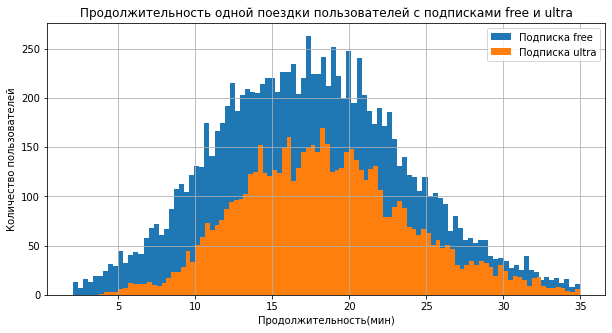

In [57]:
ax = data_free["duration"].plot(kind='hist', bins = 100, figsize=(10,5), label = "Подписка free", grid = True)
data_ultra['duration'].plot(kind='hist', bins = 100, figsize=(10,5), label = "Подписка ultra", grid = True, ax = ax)
plt.title('Продолжительность одной поездки пользователей с подписками free и ultra')
plt.xlabel('Продолжительность(мин)')
plt.ylabel('Количество пользователей')
plt.legend(loc='upper right')
plt.show()

In [58]:
print(data_ultra["duration"].describe())

count    6424.000000
mean       18.464034
std         5.458468
min         3.760353
25%        14.501104
50%        18.154805
75%        21.824876
max        34.962659
Name: duration, dtype: float64


In [59]:
print(data_free["duration"].describe())

count    11378.000000
mean        17.502813
std          6.150567
min          2.035632
25%         13.072623
50%         17.359245
75%         21.614313
max         34.948498
Name: duration, dtype: float64


Медианное значение обоих графиков расположилось примерно на одинаковой отметке, равное 17-18 минутам. На графике видно, что оба графика подчиняются нормальному распределению и имеют идентичный тренд без видимых выбросов и аномалий. График подписчиков ultra накладывается на график пользователей бесплатной подписки.

In [60]:
print(data["distance"].corr(data["duration"]))
print(data_free["distance"].corr(data_free["duration"]))
print(data_ultra["distance"].corr(data_ultra["duration"]))

0.5807552290268599
0.6170800515067143
0.48595332780811434


Можно сделать вывод, что пользователи подписки ultra имеют тенденцию в целом преодолевать один диапазон расстояний. Об этом нам говорят 2 пика на короткой и длинной дистанции. Пользователи бесплатной подписки преодолевают в свою очередь более широкий диапазон расстояний. Возможно это связано с особенностью пользователей подписки ultra и их схожести. Большинство таких пользователй могут располагаться на одной територии или в целом имеют тенденцию добираться до одинаковых точек города. Если говорить о продолжительности, то отсутствует видимое отличие между двумя группами. Можно сказать, что продолжительность поездки в целом не зависит от тип подписки. Также стоит отметить положительную корреляцию между дистанцией и продолжительностью поездки. Тем не менее, корреляция у пользователей бесплатной подписки больше чем у второй группы и имеют значения равные: 0.485 и 0.617

#### Шаг 5. Подсчёт выручки

In [61]:
data['duration'] = np.ceil(data['duration']) 

In [62]:
data_aggregated = data.pivot_table(index = ["user_id", "month", "subscription_type"], values = ["distance", "duration"], aggfunc = ["count", "sum"])

In [63]:
data_aggregated.columns = ["Количество поездок", "дроп", "Суммарное расстояние", "Суммарное время"]

In [64]:
data_aggregated = data_aggregated.drop(columns = "дроп")

In [65]:
display(data_aggregated.head())

Количество поездок  Суммарное расстояние  \
user_id month subscription_type                                             
1       1     ultra                               2           7027.511294   
        4     ultra                               1            754.159807   
        8     ultra                               2           6723.470560   
        10    ultra                               2           5809.911100   
        11    ultra                               3           7003.499363   

                                 Суммарное время  
user_id month subscription_type                   
1       1     ultra                         42.0  
        4     ultra                          7.0  
        8     ultra                         46.0  
        10    ultra                         32.0  
        11    ultra                         56.0

In [66]:
def revenue(each):
    user_id = each.name[0]
    subs_info = data.loc[data["user_id"] == user_id] 
    start_price = subs_info["start_ride_price"].values[0]
    minute_price = subs_info["minute_price"].values[0]
    subs_price =  subs_info["subscription_fee"].values[0]
    
    return start_price * each["Количество поездок"] + minute_price * np.ceil(each["Суммарное время"]) + subs_price
    
                

data_aggregated["Выручка"] = data_aggregated.apply(revenue, axis=1)

In [67]:
display(data_aggregated.head())

Количество поездок  Суммарное расстояние  \
user_id month subscription_type                                             
1       1     ultra                               2           7027.511294   
        4     ultra                               1            754.159807   
        8     ultra                               2           6723.470560   
        10    ultra                               2           5809.911100   
        11    ultra                               3           7003.499363   

                                 Суммарное время  Выручка  
user_id month subscription_type                            
1       1     ultra                         42.0    451.0  
        4     ultra                          7.0    241.0  
        8     ultra                         46.0    475.0  
        10    ultra                         32.0    391.0  
        11    ultra                         56.0    535.0

В ходе работы был создан датафрейм с агрегированными данными о поездках, где отображены суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Далее был добавлен новый столбец, который содержит информацию о выручке за каждый месяц.

#### Шаг 6. Проверка гипотез

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.

Для проверки данной гипотезы нужно обозначить нулевую и альтернативную гипотезу. Нулевая гипотеза: cредняя продолжительность поездки пользователей обоих категорий равны. Так как нам важно проверить тратит ли пользователи с подпиской больше времени, мы будем использовать одностороннюю альтернативную гипотезу. Альтернативная гипотеза: пользователи с подпиской тратят больше времени на поездки чем пользователи бесплатной поездки. 

In [68]:
alpha = 0.05
results = st.ttest_ind(data_ultra["duration"], data_free["duration"], alternative = "greater") 

print("p value:", results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p value: 1.1718818982528317e-25
Отвергаем нулевую гипотезу


Нулевая гипотеза была отвергнута в пользу альтернативной гипотезы. Можно сделать вывод, что средняя продолжительность поездок пользователей подписки ultra больше чем у пользователей бесплатной. Они действительно выгоднее для компании.

----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

Для проверки данной гипотезы нужно обозначить нулевую и альтернативную гипотезу. Нулевая гипотеза: среднее расстояние одной поездки у пользователей подписки ultra не превышает 3130 метров. Так как нам важно проверить проезжают ли пользователи с подпиской расстояние больше чем 3130 метров, мы будем использовать одностороннюю альтернативную гипотезу. Альтернативная гипотеза: среднее расстояние одной поездки у пользователей подписки ultra больше 3130 метров.

In [69]:
alpha = 0.05
value = 3130
results = st.ttest_1samp(data_ultra["distance"], value, alternative = "greater") 

print("p value:", results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p value: 0.9738795886637892
Не отвергаем нулевую гипотезу


Нулевая гипотеза не была отвергнута. Можно сделать вывод, что среднее расстояние пользователей не превышает 3130 метров. В среднем самокаты не превышают допустимый порог изнашиваемости.

----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------

Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

Для проверки данной гипотезы нужно обозначить нулевую и альтернативную гипотезу. Нулевая гипотеза: средняя помесячная выручка пользователей обоих категорий равны. Так как нам важно проверить приносят ли пользователи с подпиской выручку больше чем пользователи бесплатной подписки, мы будем использовать одностороннюю альтернативную гипотезу. Альтернативная гипотеза: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

In [70]:
revenue_ultra = data_aggregated.loc[data_aggregated.index.get_level_values('subscription_type') == 'ultra']
revenue_free = data_aggregated.loc[data_aggregated.index.get_level_values('subscription_type') == 'free']

In [71]:
alpha = 0.05
results = st.ttest_ind(revenue_ultra["Выручка"], revenue_free["Выручка"], alternative = "greater") 

print("p value:", results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p value: 3.411057520740556e-30
Отвергаем нулевую гипотезу


Нулевая гипотеза была отвергнута в пользу альтернативной. Можно сделать вывод, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Мы имеем два набора данных, где один до обновления сервера, а другой после. В данном случае я бы использовал тест st.ttest_rel(), так как важно проверить гипотезу для зависимых выборок. 

----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------

Мы имеем основания считать, что средняя продолжительность поездок пользователей подписки ultra больше чем у пользователей бесплатной. Они действительно выгоднее для компании. Также, результаты показали, что среднее расстояние пользователей не превышает 3130 метров. В среднем самокаты не превышают допустимый порог изнашиваемости. Наконец можно сделать вывод, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

#### Шаг 7. Распределения

В ходе предобработки данных в датафрейме users были устранены дубликаты. Пропуски отсутствовали. В датафрейме rides исправлен неправильный тип данных в столбце date и был добавлен новый столбец month, который хранит в себе данные о номере месяца из date. В датафреймах rides и subscriptions пропуски и дубликаты обнаружено не было.

В результате исследовательского анализа данных были получены многочисленные выводы. Большинство пользователей обосновалось в Пятигорске, Екатеринбурге и Ростове-на-Дону. Меньше всего пользователей находится в Москве. Возможно присутствует связь с наличием большого количества конкурентов в столице или развитой транспортной инфраструктуры. Пользователей подписки free на 19% больше чем ultra. Возможно пользователи не понимают выгоду от приобретения платной подписки или редко пользуются самокатом. Стоимость старта бесплатной подписки в 4 раза меньше чем абоненская плата. Пользователи могут не распологать информацией, что если они совершают как минимум 4 поездки в месяц, то они уже окупают платную подписку. Основной аудиторией являются люди в возрасте от 20 до 30 лет, их доля составляет 77%. Но больше всего самокатами пользуются 25 летние пользователи. Можно выделить 2 разных типа дистанции, которым соответствуют собственные пики. На короткой дистанции до 1500 метров, большинство пользователей проезжают около 650 метров. На большой дистанции значения расположились около 3000 метров. Касательно продолжительности поездки, то доля поездок от 15 до 20 минут составляет 79% от всех поездок. Большинство пользователей заканчивают поездку за 17 минут.

При проверке гипотех были получены следующие выводы: Мы имеем основания считать, что средняя продолжительность поездок пользователей подписки ultra больше чем у пользователей бесплатной. Они действительно выгоднее для компании. Также, результаты показали, что среднее расстояние пользователей не превышает 3130 метров. В среднем самокаты не превышают допустимый порог изнашиваемости. Наконец можно сделать вывод, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 